In [1]:
import cv2
import numpy as np
import plotly.express as px
# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 8]
from OrientationCalculator import OrientationCalculator as OC

In [4]:
def display_img(img):
    px.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)).show()


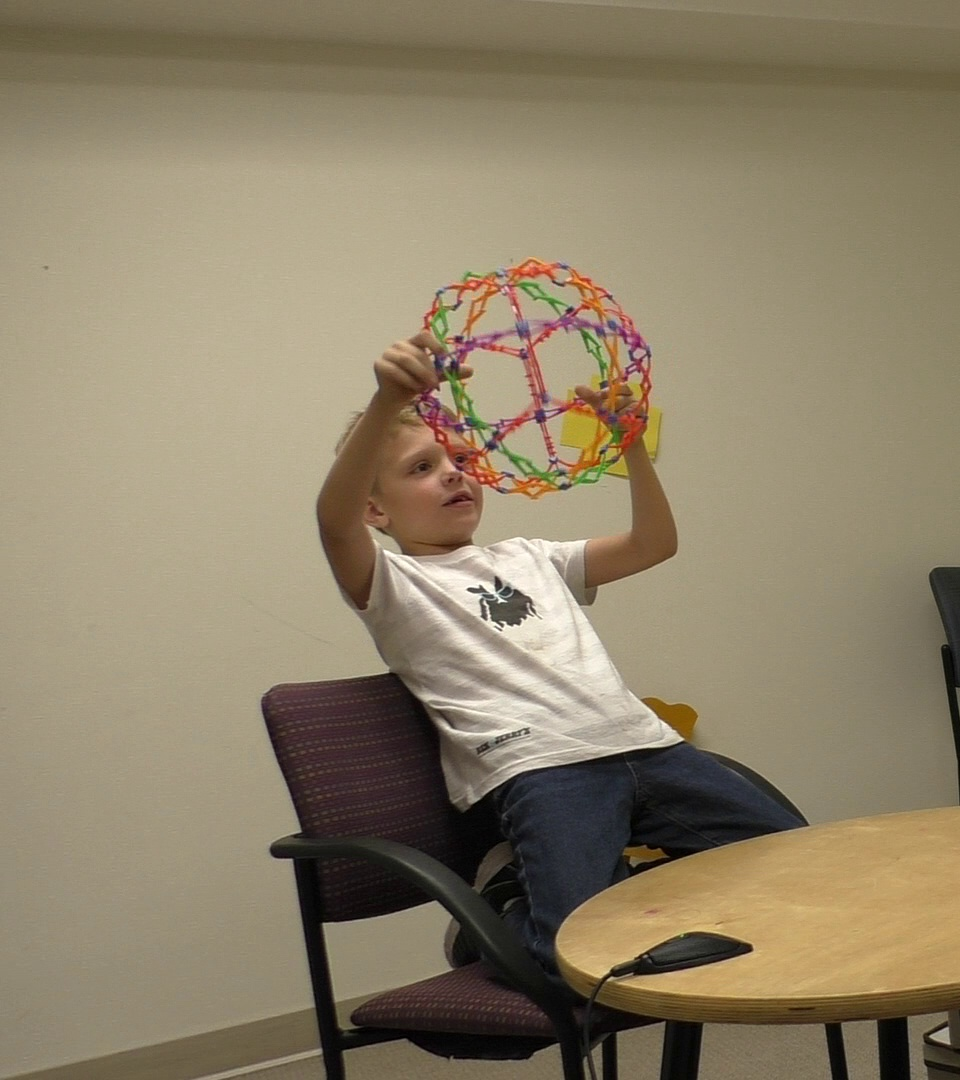

In [5]:
img_raw = cv2.imread('results/imgs/org_210.jpg')
img_raw = img_raw[:,:img_raw.shape[1]//2,:]
display_img(img_raw)
with open("results/txt/210.txt", mode='r') as f:
    video_name = f.readline()
    bboxs_num = int(f.readline())
    # for i in range(bboxs_num):
    x, y, w, h, confidence = f.readline().strip().split(" ")
    b = np.array(f.readline().split()).astype(np.float32)




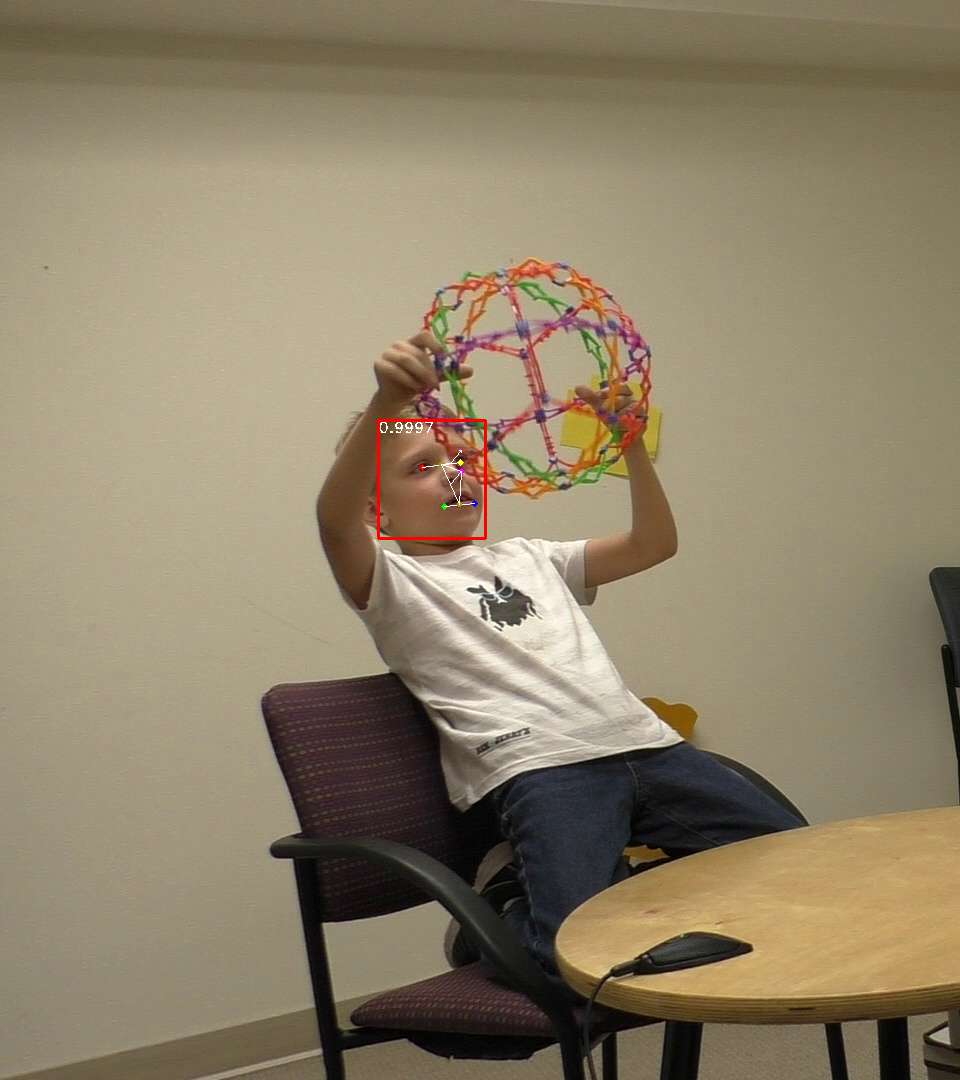

In [6]:
text = "{:.4f}".format(b[4])
b = list(map(int, b))
cv2.rectangle(img_raw, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 2)
cx = b[0]
cy = b[1] + 12
cv2.putText(img_raw, text, (cx, cy),
            cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255))

# landms

eye_l_pt, eye_r_pt = (b[5], b[6]), (b[7], b[8])
nose_pt = (b[9], b[10])
mouth_l_pt, mouth_r_pt = (b[11], b[12]), (b[13], b[14])

cv2.circle(img_raw, eye_l_pt, 1, (0, 0, 255), 4)
cv2.circle(img_raw, eye_r_pt, 1, (0, 255, 255), 4)
cv2.circle(img_raw, nose_pt, 1, (255, 0, 255), 4)
cv2.circle(img_raw, mouth_l_pt, 1, (0, 255, 0), 4)
cv2.circle(img_raw, mouth_r_pt, 1, (255, 0, 0), 4)

line_color = (255, 255, 255)
cv2.line(img_raw, eye_l_pt, eye_r_pt, line_color, 1) 
btw_eyes_pt = OC.center(eye_l_pt, eye_r_pt)
cv2.circle(img_raw, btw_eyes_pt, 1, (0, 155, 155), 2)

cv2.line(img_raw, mouth_l_pt, mouth_r_pt, line_color, 1)
btw_mouth_pt = OC.center(mouth_l_pt, mouth_r_pt)
cv2.circle(img_raw, btw_mouth_pt, 1, (0, 155, 155), 2)

cv2.line(img_raw, btw_eyes_pt, nose_pt, line_color, 1)
cv2.line(img_raw, btw_mouth_pt, nose_pt, line_color, 1)
cv2.line(img_raw, btw_mouth_pt, btw_eyes_pt, line_color, 1)
# cv2.line(img_raw, eye_l_pt, mouth_r_pt, line_color, 1)
# cv2.line(img_raw, eye_r_pt, mouth_l_pt, line_color, 1)

# below_nose_pt = self.get_intersection_pt(
#     [eye_l_pt, mouth_r_pt],
#     [eye_r_pt, mouth_l_pt])

# print(below_nose_pt)
# print(eye_l_pt, eye_r_pt)
# print(mouth_l_pt, mouth_r_pt)
below_nose_pt = OC.center(btw_eyes_pt, btw_mouth_pt)
cv2.line(img_raw, below_nose_pt, nose_pt, line_color, 1)



looking_arrow =\
    OC.translation(
        [below_nose_pt, nose_pt],
        y = OC.distance(btw_eyes_pt, btw_mouth_pt)//2,
        y_dir = -1
    )

cv2.arrowedLine(
    img_raw, looking_arrow[0], looking_arrow[1],
    line_color, 1 
)

# DEBUG
cv2.line(
    img_raw, btw_eyes_pt, looking_arrow[0],
    line_color, 1 
)

display_img(img_raw)